In [ ]:
import pandas as pd
# Load the final dataframe (feature engineered, encoded, scaled/unscaled)
df_final_scaled = pd.read_csv('/Users/femke/Documents/Uni/DSS/Thesis/Data/df_final_scaled.csv')
df_final_unscaled = pd.read_csv('/Users/femke/Documents/Uni/DSS/Thesis/Data/df_final_unscaled.csv')

## K-Means clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

In [2]:
df_final = pd.read_csv("/Users/femke/Documents/Uni/DSS/Thesis/Data/ml1m_df_final.csv")
df_final = df_final.drop(columns=["Title"])


In [3]:
df_final.dtypes

UserID                    int64
MovieID                   int64
Rating                    int64
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
Minute                    int64
Second                    int64
Male                       bool
Age                       int64
Zip-code                  int64
Release_year              int64
Action                     bool
Adventure                  bool
Animation                  bool
Children's                 bool
Comedy                     bool
Crime                      bool
Documentary                bool
Drama                      bool
Fantasy                    bool
Film-Noir                  bool
Horror                     bool
Musical                    bool
Mystery                    bool
Romance                    bool
Sci-Fi                     bool
Thriller                   bool
War                        bool
Western                    bool
Artist  

In [2]:
# Google colab version
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the CSV file into a dataframe
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/ml1m_df_final.csv')
df_final = df_final.drop(columns=["Title"])

In [4]:
# Scaling the variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

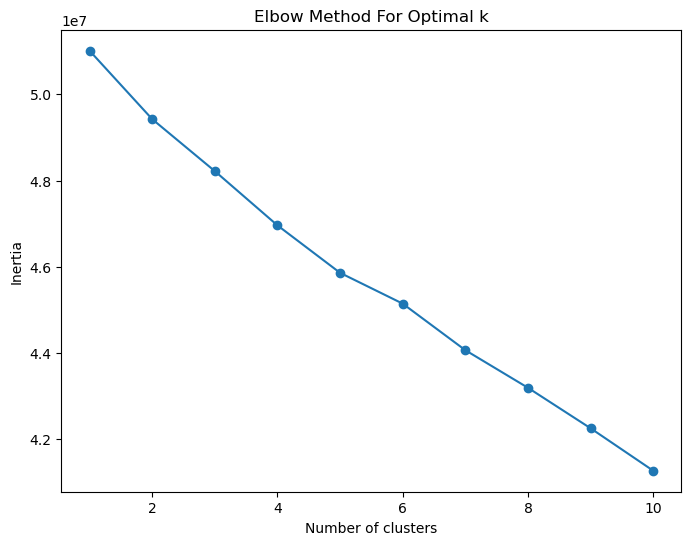

In [ ]:
# Determine k in range of (1,11)
# Determine the range of clusters to evaluate
cluster_range = range(1, 11)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

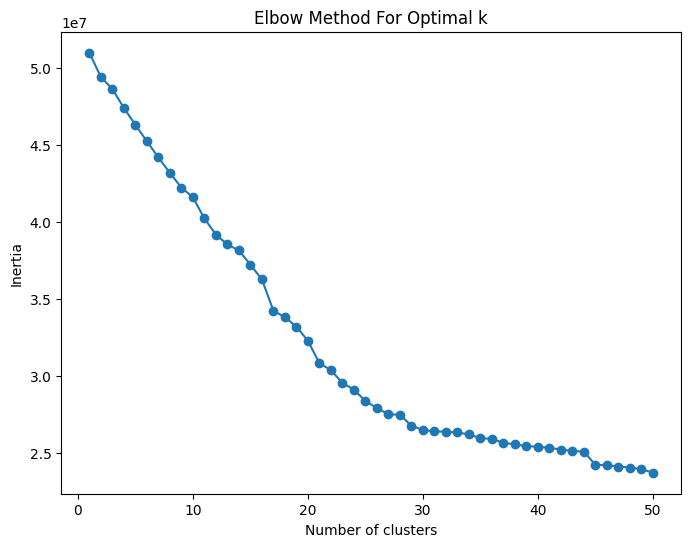

In [ ]:
# Determine k in range of (1,51)
cluster_range = range(1, 51)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Subset of data to get the silhoette score as well


In [7]:
# Using subset of 5% of the data
df_sample = df_final.sample(frac=0.05, random_state=42)
df_scaled = scaler.fit_transform(df_sample)

In [23]:
# Silhoette and elbow method in 1 -> takes forever crashes the computer 
# Scale the features
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_final)

# Determine the range of clusters to evaluate
cluster_range = range(2, 36)  # Silhouette score isn't meaningful for a single cluster
inertia = []
silhouette_avg = []

# Calculate the within-cluster sum of squares and silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=4)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the results to find the elbow point and silhouette score
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cluster_range, inertia, 'g-')
ax2.plot(cluster_range, silhouette_avg, 'b-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='g')
ax2.set_ylabel('Silhouette Score', color='b')

plt.title('Elbow Method and Silhouette Score For Optimal k')
plt.show()

KeyboardInterrupt: 

In [11]:
# Silhouette score using subset of 5% of the data
df_sample = df_final.sample(frac=0.05, random_state=42)
df_scaled = scaler.fit_transform(df_sample)

# Set clusters based on Elbow method and silhouette score ^^
optimal_k = 29

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign cluster labels to df
labels = kmeans.labels_
df_sample['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 29 clusters: 0.14849584472759908


In [12]:
# Renew the variables to get silhoette for complete data
# Load the CSV file into a dataframe
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/ml1m_df_final.csv')
df_final = df_final.drop(columns=["Title"])
# Scaling the variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

In [13]:
# Silhouette score full dataset using k = 29
# Set clusters based on Elbow method and silhouette score ^^
optimal_k = 29

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign cluster labels to df
labels = kmeans.labels_
df_final['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 29 clusters: 0.13954713728801585


In [16]:
# Check the first few rows with cluster labels
print(df_final.head())

   UserID  MovieID  Rating  Year  Month  Day  Hour  Minute  Second   Male  \
0       1     1193       5  2000     12   31    23      12      40  False   
1       2     1193       5  2000     12   31    22      33      33   True   
2      12     1193       4  2000     12   31     0      49      39   True   
3      15     1193       4  2000     12   30    19       1      19   True   
4      17     1193       5  2000     12   30     7      41      11   True   

   ...  Programmer  Retired  Sales/marketing  Scientist  Self-employed  \
0  ...       False    False            False      False          False   
1  ...       False    False            False      False           True   
2  ...        True    False            False      False          False   
3  ...       False    False            False      False          False   
4  ...       False    False            False      False          False   

   Technician/engineer  Tradesman/craftsman  Unemployed  Writer  cluster  
0                

In [17]:
# Mean per cluster
cluster_summary = df_final.groupby('cluster').mean()
print(cluster_summary)

              UserID      MovieID    Rating         Year      Month  \
cluster                                                               
0        2839.665534  1888.485959  3.478644  2000.117408   8.949258   
1        2883.095233  1874.073256  3.648247  2000.117781   8.972514   
2        3026.825610  1920.191264  3.529766  2000.133482   8.593573   
3        2933.345781  1892.003168  3.529805  2000.165130   8.790724   
4        2510.091627  1890.187741  3.527820  2000.249215   8.957507   
5        3024.077313  1895.957082  3.604588  2000.134375   8.637445   
6        3449.535414  1840.666636  3.675593  2000.120187   8.024933   
7        3180.520851  1917.877213  3.530117  2000.096144   8.826493   
8        3055.149586  1755.097065  3.441609  2000.101450   8.718508   
9        3357.503227  1895.530648  3.589242  2000.143696   8.072519   
10       2650.183696  1950.752382  3.781616  2000.058178   9.567013   
11       3049.612832  1582.953540  3.679204  2000.120206   8.862094   
12    

In [19]:
# Save df_kmeans_clustered -> Df with assigned clusters using kmeans algorithm with k = 29
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_kmeans_clustered.csv', index=False)


## Hierarcical clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_final = pd.read_csv("/Users/femke/Documents/Uni/DSS/Thesis/Data/ml1m_df_final.csv")
df_final = df_final.drop(columns=["Title"])

In [ ]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Determine the range of clusters to evaluate
cluster_range = range(1, 11)
linkage_matrix = linkage(df_scaled, method='ward')

# Calculate the within-cluster sum of squares for each number of clusters
inertia = []
for k in cluster_range:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    inertia.append(np.sum(np.min(linkage_matrix[:, 2], axis=0)))

# Plot the results to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
